In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib nbagg

In [71]:
epsilon = 2e-5
time = np.arange(0,3,epsilon)
L_air = 1e-8*np.float64(np.logical_or(np.logical_and(time>0.5,time<0.8),np.logical_and(time>2.2,time<2.5)))
# L_air = 1e-8*np.float64(np.logical_and(time>0.2,time<0.4))

#parameters
ki = 10**6
k1 = 0.209
n = 0.05517291
km1 = 7.9
k2 = 16.8
km2= 98
k3 = 100
km3 = 98.9
k4 = 4e4
R_tot = 1.64e-1
N_tot = 1
Cm = 0.00144 
gL = 1.44 
EL = -62. 
ER = 0, 
Vreset = -62 
theta0 = -45
tau = 0.59512792 
Delta = 0.77496971 
gamma = 98.38484201

def dXdt(X,t):
    L,R,Rs,N,V = X
    dL = ki*L_air[int(t/epsilon)]-n*k1*(L**n)*R+km1*n*(R_tot-Rs-R)-k3*N*L+km3*(N_tot-N)
    dR = -k1*(L**n)*R + km1*(R_tot-Rs-R)
    dRs = 0#k2*(R_tot-R-Rs)-km2*Rs
    dN = -k3*L*N + (km3+k4)*(N_tot-N)
    dV = - gL/Cm*(V - EL) - gamma*Rs/Cm*(V - ER) #- 0.6*gL/Cm*np.random.normal()*(V-ER)
    return np.array([dL,dR,dRs,dN,dV],dtype=np.float64)

X = np.zeros((6,time.shape[0]))
X[:,0] = [0,R_tot,0,N_tot,-62,1]
sp = np.zeros(time.shape[0])

for i in tqdm(range(1,time.shape[0])):
    X[:-1,i] = X[:-1,i-1] + epsilon*dXdt(X[:-1,i-1],time[i-1])
    if X[0,i]<0:
        X[0,i] = 0
    X[-1,i] = X[-1,i]*np.exp(epsilon/tau)
    if X[4,i]>theta0+X[-1,i]:
        X[4,i] = Vreset
        X[-1,i] = X[-1,i-1]+Delta/tau
        sp[i]=1


<IPython.core.display.Javascript object>


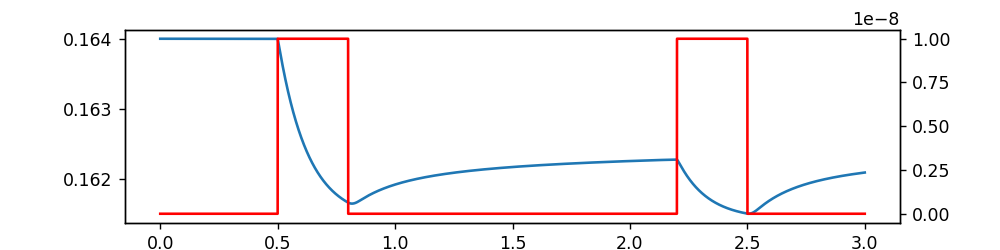

In [72]:
plt.figure(figsize=(8,2))
plt.plot(time,X[1,:])
# plt.plot(time,X[4,:])
# plt.scatter(time[sp>0],sp[sp>0]-62,c='k',s=50000,marker='|')
# plt.ylim([-80,0])
ax2 = plt.gca().twinx()
ax2.plot(time,L_air,'r-')
plt.show()

In [10]:
epsilon = 0.01
time = np.arange(0,1,epsilon)
L_air = 1e-8*np.float64(np.logical_and(time>0.5,time<0.8))

#parameters
ki = 10**6
k1 = 0.209
n = 0.05517291
km1 = 7.9
k2 = 16.8
km2= 98
k3 = 100
km3 = 98.9
k4 = 4e4
R_tot = 1.64
N_tot = 1
Cm = 0.00144 
gL = 1.44 
EL = -62. 
ER = 0, 
Vreset = -62 
theta0 = -55
tau = 0.59512792 
Delta = 0.77496971 
gamma = 98.38484201

def dXdt(X,t):
    L,R,Rs,N,V = X
    dL = ki*L_air[int(t/epsilon)]-n*k1*(L**n)*R+km1*n*(R_tot-Rs-R)-k3*N*L+km3*(N_tot-N)
    dR = -k1*(L**n)*R + km1*(R_tot-Rs-R)
    dRs = k2*(R_tot-R-Rs)-km2*Rs
    dN = -k3*L*N + (km3+k4)*(N_tot-N)
    dV = - gL/Cm*(V - EL) - gamma*Rs/Cm*(V - ER) - gL/Cm*np.random.normal()*(V-ER)
    return np.array([dL,dR,dRs,dN,dV])

X = np.zeros((6,time.shape[0]))
X[:,0] = [0,R_tot,0,N_tot,-62,1]
sp = np.zeros(time.shape[0])

for i in range(1,time.shape[0]):
    X[:-1,i] = X[:-1,i-1] + epsilon*dXdt(X[:-1,i-1],time[i-1])
    if X[0,i]<0:
        X[0,i] = 0
    X[-1,i] = X[-1,i]*np.exp(epsilon/tau)
    if X[4,i]>theta0+X[-1,i]:
        X[4,i] = Vreset
        X[-1,i] = X[-1,i-1]+Delta/tau
        sp[i]=1


<ipython-input-10-4517345458e0>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([dL,dR,dRs,dN,dV])
<ipython-input-10-4517345458e0>:29: RuntimeWarning: overflow encountered in double_scalars
  dL = ki*L_air[int(t/epsilon)]-n*k1*(L**n)*R+km1*n*(R_tot-Rs-R)-k3*N*L+km3*(N_tot-N)
<ipython-input-10-4517345458e0>:32: RuntimeWarning: overflow encountered in double_scalars
  dN = -k3*L*N + (km3+k4)*(N_tot-N)
<ipython-input-10-4517345458e0>:29: RuntimeWarning: invalid value encountered in double_scalars
  dL = ki*L_air[int(t/epsilon)]-n*k1*(L**n)*R+km1*n*(R_tot-Rs-R)-k3*N*L+km3*(N_tot-N)
<ipython-input-10-4517345458e0>:32: RuntimeWarning: invalid value encountered in double_scalars
  dN = -k3*L*N + (km3+k4)*(N_tot-N)
